In [31]:
from conf import *
from pathlib import Path
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from functools import wraps
import geopandas as gpd
from shapely.geometry import Point


In [32]:
#Set the path of the data rather than in local.
base= Path('.')
DATA_DIR = base / "data" / "clean"
DATA_DIR.mkdir(parents=True, exist_ok=True)
#The Airbnb data
DATA_URL = "https://orca.casa.ucl.ac.uk/~jreades/data/20250615-London-listings.csv.gz"
DATA_PATH = DATA_DIR / "20250615-London-listings.csv.gz"


In [33]:
#Wrap the download data function with the decorato, and
#download the Airbnb data.
def check_cache(f):
    @wraps(f)
    def wrapper(src, dest):
        dest = Path(dest)
        if dest.exists() and dest.is_file():
            print(f"{dest} found locally!")
            return dest
        else:
            print(f"{dest} not found, downloading!")
            return f(src, dest)
    return wrapper

@check_cache
def download_data(src, dest):
    dest = Path(dest)
    dest.parent.mkdir(parents=True, exist_ok=True)
    response = urlopen(src)
    with dest.open("wb") as f:
        f.write(response.read())
    print(f"Data written to {dest}!")
    return dest

def load_listings():
    local_path = download_data(DATA_URL, DATA_PATH)
    return pd.read_csv(local_path)

# print a few for test.
df = load_listings()
df.head()

data/clean/20250615-London-listings.csv.gz found locally!


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,...,4.52,4.36,4.38,NaN,t,11,11,0,0,0.43
3,264779,https://www.airbnb.com/rooms/264779,20250610032232,2025-06-11,city scrape,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,1389063,...,4.61,4.50,4.47,NaN,t,11,11,0,0,0.30
4,264780,https://www.airbnb.com/rooms/264780,20250610032232,2025-06-11,city scrape,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,1389063,...,4.74,4.37,4.59,NaN,t,11,11,0,0,0.35


In [ ]:
#Set the path of spatial data
SPATIAL_DIR = base / 'data' / 'spatial'
SPATIAL_DIR.mkdir(parents=True, exist_ok=True)

In [39]:
#make a function to download the spatial data
def download_spatial(src_url, filename):
    dest = SPATIAL_DIR / filename
    if dest.exists():
        print(f"{filename} found locally!")
        return dest
    
    print(f"Downloading {filename}...")
    response = urlopen(src_url)
    with open(dest, 'wb') as f:
        f.write(response.read())
    print(f"Saved to {dest}")
    
    return dest

#the url of every spatial data
RAW_URLS = {
    "boroughs": "https://raw.githubusercontent.com/jreades/fsds/master/data/src/Boroughs.gpkg",
    "water": "https://raw.githubusercontent.com/jreades/fsds/master/data/src/Water.gpkg",
    "greenspace": "https://raw.githubusercontent.com/jreades/fsds/master/data/src/Greenspace.gpkg",
    "msoa": "https://orca.casa.ucl.ac.uk/~jreades/data/MSOA-2011.gpkg",
    "msoa_names": "https://houseofcommonslibrary.github.io/msoanames/MSOA-Names-1.20.csv",
}

In [40]:
# Download all spatial files defined in RAW_URLS
local_paths = {}  # store downloaded paths

for key, url in RAW_URLS.items():
    filename = url.split("/")[-1]  # extract file name from URL
    local_path = download_spatial(url, filename)
    local_paths[key] = local_path  # store for later use

Boroughs.gpkg found locally!
Saved to data/spatial/Water.gpkg
Saved to data/spatial/Greenspace.gpkg
Saved to data/spatial/MSOA-2011.gpkg
Saved to data/spatial/MSOA-Names-1.20.csv


In [42]:
#define every spatial data
boroughs = gpd.read_file(local_paths["boroughs"])
msoa = gpd.read_file(local_paths["msoa"])
greenspace = gpd.read_file(local_paths["greenspace"])
msoa_names = pd.read_csv(local_paths["msoa_names"])
water= gpd.read_file(local_paths["water"])

In [ ]:
#merge the msoa data and msoa names
merged_msoa = msoa_gdf.merge(
    msoa_nms,
    left_on="MSOA11CD",
    right_on="msoa11cd",
    how="left"
)


Because the main analysis is based on price, property type, number of listings from the landlord, and number of bookable nights, we are doing some data cleaning base on that.

In [5]:
#remove special character in price
df['price'] = (df['price'].astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .replace("", None)
        .astype(float)
    )

In [6]:
#remove invalid prices
df = df[df['price'] > 0].copy()

In [7]:
#keep valid availability range
df = df[df['availability_365'].between(0, 365)]

In [8]:
#drop listings without spatial coordinates
df = df.dropna(subset=['latitude', 'longitude'])

In [9]:
#fill missing host listing count
df['host_total_listings_count'] = df['host_total_listings_count'].fillna(1)

In [10]:
#because there are some extreme luxury house, may set a cap on price.
df = df[df['price'] < 2000] #2000 maybe a proper price cap..

# 1.Is Airbnb “Out of Control” in London

To assess whether Airbnb in London is experiencing "over control", we may say some illegal renting or pricing may causing over control. 

In [30]:
from IPython.display import display_markdown

def as_markdown(head='', body='Some body text'):
    if head != '':
        display_markdown(f"##### {head}\n\n>{body}\n", raw=True)
    else:
        display_markdown(f">{body}\n", raw=True)

as_markdown('# 1.1', "There is a 90 days regulation(also known as short-let regulation)(https://www.nestify.co.uk/article/90-day-rule/), Short-term rentals are permitted for a maximum of 90 days a year, exceeding this period requires a special permit.  so are the Airbnb hosts against this policy will be a perspect.")

##### # 1.1

>There is a 90 days regulation(also known as short-let regulation)(https://www.nestify.co.uk/article/90-day-rule/), Short-term rentals are permitted for a maximum of 90 days a year, exceeding this period requires a special permit.  so are the Airbnb hosts against this policy will be a perspect.


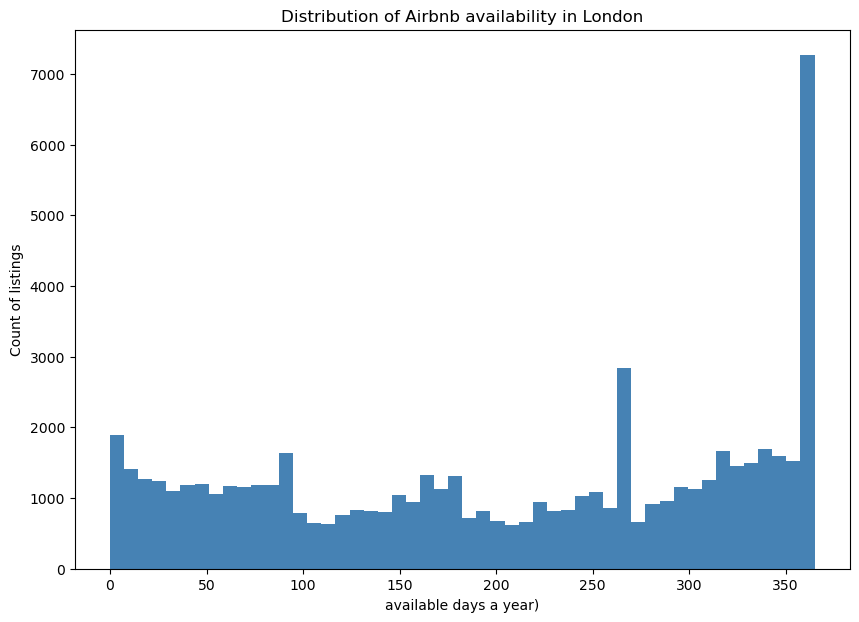

In [12]:
#The availability_365 distribution can indicate 
#whether Airbnb in London is a "seasonal short-term rental" 
#(low availability) or a "year-round operation" 
#(high availability).

# Plot distribution of availability_365
plt.figure(figsize=(10, 7))
plt.hist(df['availability_365'], bins=50, color='steelblue')
plt.xlabel("available days a year)")
plt.ylabel("Count of listings")
plt.title("Distribution of Airbnb availability in London")
plt.show()

In [13]:
#availability_365 > 90 is a potential key element
#of illegal hosting. 

#count the number of listing over 90, 180 and 300.
over_90 = (df['availability_365'] > 90)
over_180 = (df['availability_365'] > 180)
over_300 = (df['availability_365'] > 300)

print(f"Share of listings available > 90 days: {over_90.mean():.2%}")
print(f"Share of listings available > 180 days: {over_180.mean():.2%}")
print(f"Share of listings available > 300 days: {over_300.mean():.2%}")

Share of listings available > 90 days: 73.86%
Share of listings available > 180 days: 55.83%
Share of listings available > 300 days: 30.33%


In [14]:
# Compare availability patterns across room types
room_groups = df.groupby('room_type')['availability_365']

over_90_by_room = room_groups.apply(lambda x: (x > 90).mean())
print("Share of >90-day listings by room type:")
print((over_90_by_room * 100).round(2).astype(str) + "%")

Share of >90-day listings by room type:
room_type
Entire home/apt    73.72%
Hotel room         79.41%
Private room       74.01%
Shared room        87.21%
Name: availability_365, dtype: object


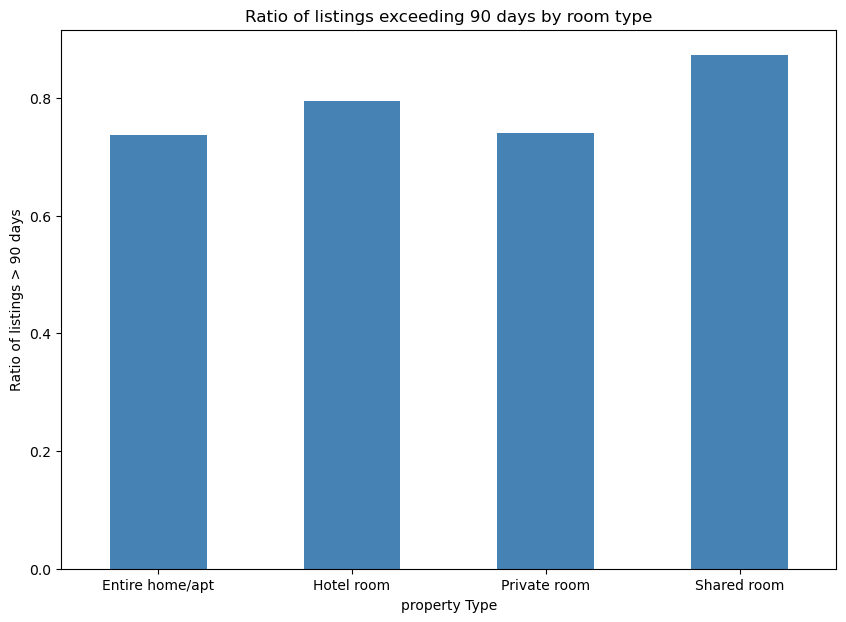

In [15]:
#plot ratio of property type >90
ax = over_90_by_room.plot(kind='bar', figsize=(10, 7), color='steelblue')
ax.set_xlabel("property Type")
ax.set_ylabel("Ratio of listings > 90 days")
ax.set_title("Ratio of listings exceeding 90 days by room type")
plt.xticks(rotation=0)
plt.show()

<Figure size 800x500 with 0 Axes>

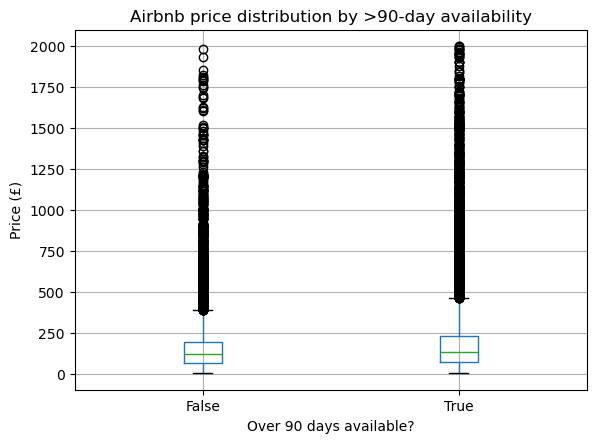

In [16]:
#Also can look at the price level of those over 90 days a year.
df['over_90'] = df['availability_365'] > 90

plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='over_90')
plt.title("Airbnb price distribution by >90-day availability")
plt.suptitle("")
plt.xlabel("Over 90 days available?")
plt.ylabel("Price (£)")
plt.show()

In [17]:
as_markdown('#1.2','Price level is another key aspect to indicate if airbnb out of control.')

##### #1.2

>Price level is another key aspect to indicate if airbnb out of control.


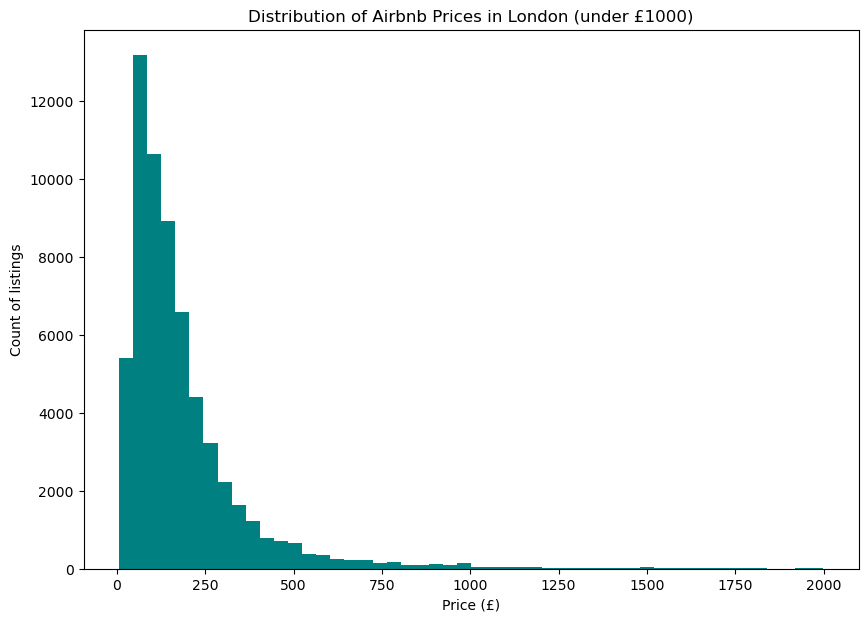

In [18]:
#Plot distribution of Airbnb prices
plt.figure(figsize=(10, 7))
plt.hist(df['price'], bins=50, color='teal')
plt.xlabel("Price (£)")
plt.ylabel("Count of listings")
plt.title("Distribution of Airbnb Prices in London (under £1000)")
plt.show()

In [19]:
#Look at some statistics on price
print("Price summary statistics:")
print(df['price'].describe())

Price summary statistics:
count    62445.000000
mean       185.369541
std        185.407696
min          6.000000
25%         75.000000
50%        134.000000
75%        224.000000
max       1999.000000
Name: price, dtype: float64


In [20]:
#We set a price level that ober 200 a night 
#could be "higher than usual", It may deviate from 
#Airbnb's original purpose.

high_price = df['price'] > 200
print(f"Share of listings priced > £200: {high_price.mean():.2%}")
#Shows price over 200 by room type.
high_price_by_type = df.groupby('room_type')['price'].apply(lambda x: (x > 200).mean())
print("\nShare of >£200 listings by room type:")
print((high_price_by_type * 100).round(2).astype(str) + "%")


Share of listings priced > £200: 29.38%

Share of >£200 listings by room type:
room_type
Entire home/apt    41.32%
Hotel room         41.18%
Private room        4.13%
Shared room         5.81%
Name: price, dtype: object


In [21]:
#Combine with the 90 days rule, count the ratio that
#satisfy over 200 a night and 90 a year.
df['over_90'] = df['availability_365'] > 90
df['high_price'] = df['price'] > 200
df['high_high'] = df['over_90'] & df['high_price']

print(f"Share of listings both >90 days and >£150: {df['high_high'].mean():.2%}")

Share of listings both >90 days and >£150: 22.91%


# 2. How many professional landlords are there?
To assess whether Airbnb in London is experiencing "over control", we may say a host with multiple renting houses are over-commercialisation is causing over control. So start with analyzed the number of listings available from each host.

Ratio of hosts with >2 listings: 65.10%


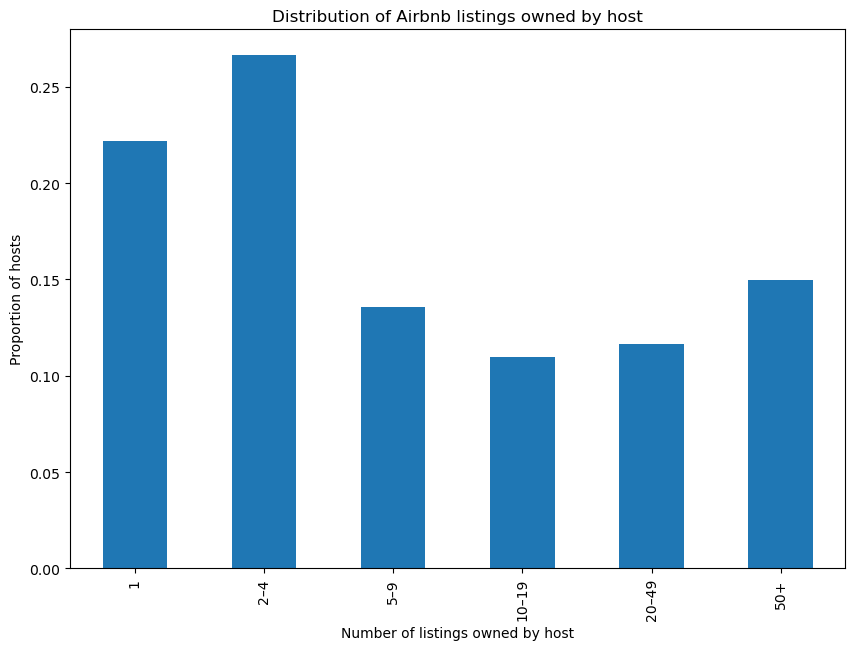

In [22]:
#calculate proportion of hosts with more than 2 listings
host_counts = df['host_total_listings_count']
multiratio = (host_counts > 2).mean()
print(f"Ratio of hosts with >2 listings: {multiratio:.2%}")

#Define bin and labels（menas how houses many a host renting)
bins = [0, 1, 4, 9, 19, 49, 999]
labels = ["1", "2–4", "5–9", "10–19", "20–49", "50+"]

# Create categorical bin column
df['host_bin'] = pd.cut(host_counts, bins=bins, labels=labels)
# Compute the ratio of hosts
dist = (df['host_bin'].value_counts(normalize=True).sort_index())
#plot
ax = dist.plot(kind='bar', figsize=(10, 7))
ax.set_xlabel("Number of listings owned by host")
ax.set_ylabel("Proportion of hosts")
ax.set_title("Distribution of Airbnb listings owned by host")
plt.show()

In [23]:
#proportion of hosts with > 2 listings
host_level = df.groupby('host_id')['host_total_listings_count'].max()
multi_host_share = (host_level > 2).mean()
print(f"Proportion of multi-lister hosts (>2 listings): {multi_host_share:.2%}")

#proportion of listings owned by multi-listers
listing_multi_share = (df['host_total_listings_count'] > 2).mean()
print(f"Proportion of listings owned by multi-listers: {listing_multi_share:.2%}")


Proportion of multi-lister hosts (>2 listings): 35.02%
Proportion of listings owned by multi-listers: 65.10%


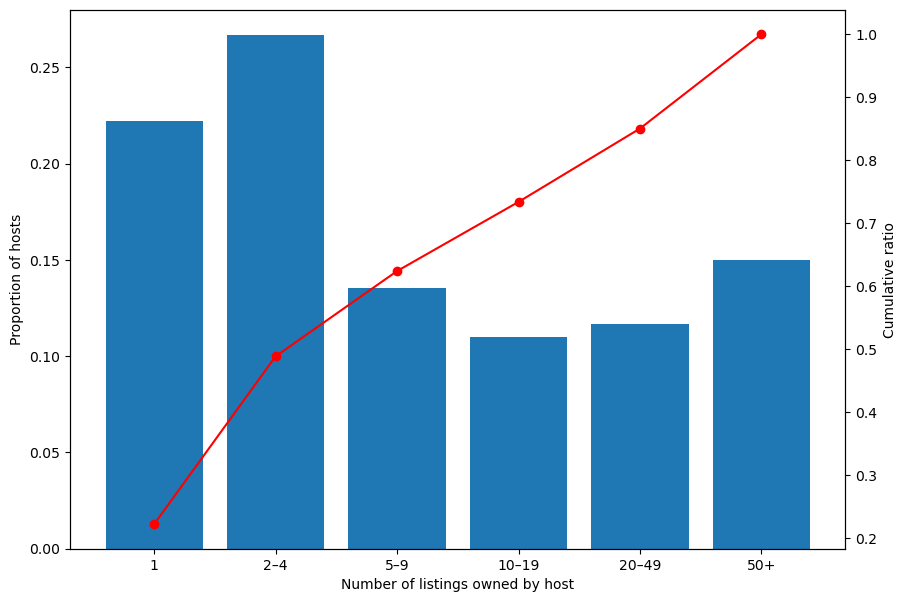

Cumulative share by bin:
host_bin
1        22.19%
2–4      48.85%
5–9      62.39%
10–19    73.37%
20–49    85.02%
50+      100.0%
Name: proportion, dtype: object


In [24]:
#Make a cumulative distribution
#compute cumulative ratio across host-size bins
cum = dist.cumsum()
#graph fitting
fig, ax1 = plt.subplots(figsize=(10, 7))
# Plot a same graph above
ax1.bar(dist.index, dist.values, label="Bin share")
ax1.set_xlabel("Number of listings owned by host")
ax1.set_ylabel("Proportion of hosts")
#Create another axis for cumulative line plot
ax2 = ax1.twinx()
ax2.plot(cum.index, cum.values, color="red", marker="o", label="Cumulative ratio")
ax2.set_ylabel("Cumulative ratio")
plt.show()
#Print cumulative ratio values
print("Cumulative share by bin:")
print((cum * 100).round(2).astype(str) + "%")


# 3.How many properties would be affected by the opposition’s proposal?

In [25]:
#Find all professional landlords' host_id
pro_hosts = df[df['host_total_listings_count'] > 2]['host_id'].unique()
#Filter all listings under these landlords' names
affected_properties = df[df['host_id'].isin(pro_hosts)]
#Calculate the number of affected properties
n_affected = len(affected_properties)
#Compared to the entire Airbnb market
total_listings = len(df)
affected_ratio = n_affected / total_listings

n_affected, affected_ratio

(40651, 0.6509888702057811)

In [28]:
as_markdown("3.1","A bar chart showing the distribution of affected listings by region")

##### 3.1

>A bar chart showing the distribution of affected listings by region


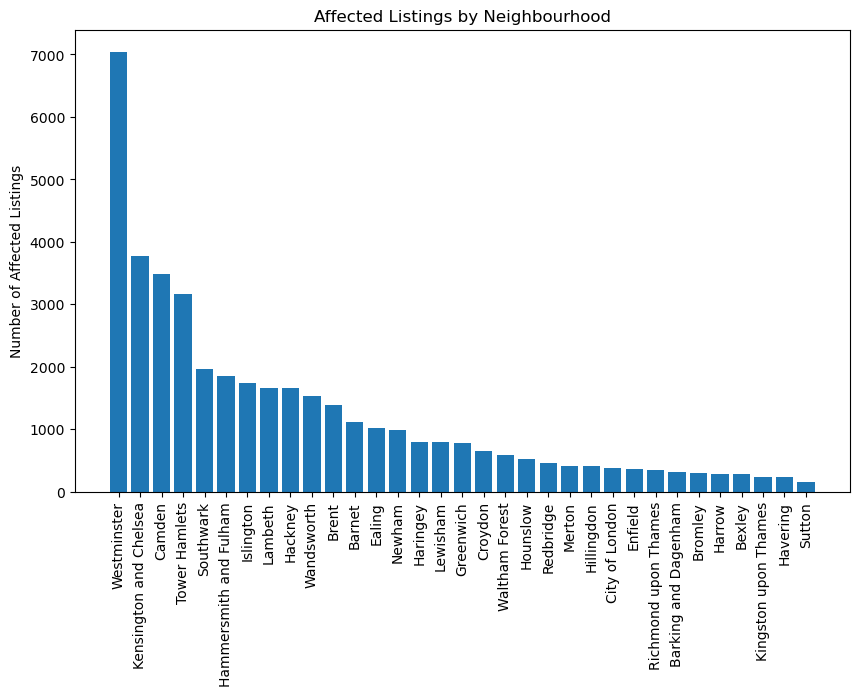

In [26]:
affected_by_area = (
    affected_properties.groupby('neighbourhood_cleansed')
                       .size()
                       .reset_index(name='n_affected')
                       .sort_values('n_affected', ascending=False)
)

plt.figure(figsize=(10,6))
plt.bar(affected_by_area['neighbourhood_cleansed'], affected_by_area['n_affected'])
plt.xticks(rotation=90)
plt.ylabel('Number of Affected Listings')
plt.title('Affected Listings by Neighbourhood')
plt.show()

##Display the location of professional landlord listings on a map

In [29]:
as_markdown("3.2","Display the location of professional landlord listings on a map")

##### 3.2

>Display the location of professional landlord listings on a map


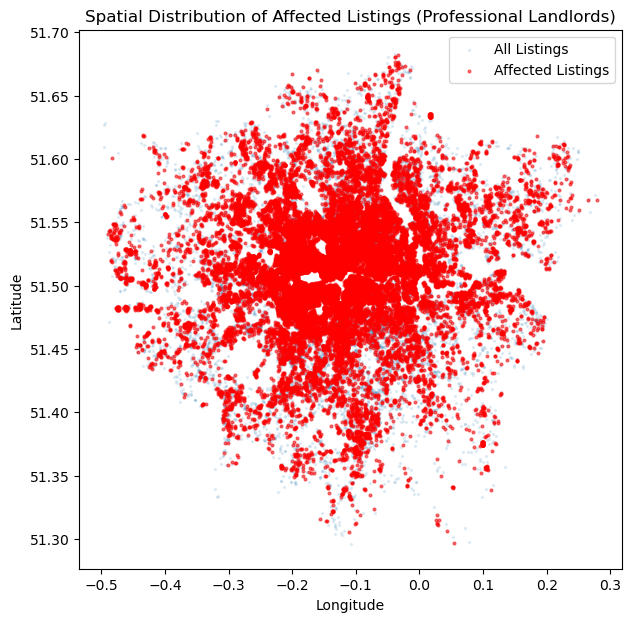

In [27]:
plt.figure(figsize=(7,7))
plt.scatter(df['longitude'], df['latitude'], s=2, alpha=0.1, label='All Listings')
plt.scatter(affected_properties['longitude'], affected_properties['latitude'], s=4, color='red', alpha=0.5, label='Affected Listings')

plt.legend()
plt.title('Spatial Distribution of Affected Listings (Professional Landlords)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()